<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/main/DLY0100_Entrega_1_Equipo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 1 - Entrenando redes feedforward

**Autores:**

+ Nicolas Navarro
+ Gabriela Sandoval

**Correos Electrónicos:**

+ ni.navarroa@duoc.cl
+ g.sandoval@duoc.cl

**Fecha de Creación:** Abril de 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 1 de la asignatura de Deep Learning de la carrera de Ingeniería en Informática de DuocUC sede Concepción.

---

## Requisitos de Software

Este notebook fue desarrollado con Python ...

# Carga de datos

In [3]:
!rm -f train-images-idx3-ubyte.gz train-labels-idx1-ubyte.gz t10k-images-idx3-ubyte.gz t10k-labels-idx1-ubyte.gz

!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-images-idx3-ubyte.gz
!wget https://storage.googleapis.com/cvdf-datasets/mnist/t10k-labels-idx1-ubyte.gz


--2025-04-16 05:10:05--  https://storage.googleapis.com/cvdf-datasets/mnist/train-images-idx3-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.163.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  26.0MB/s    in 0.4s    

2025-04-16 05:10:05 (26.0 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2025-04-16 05:10:05--  https://storage.googleapis.com/cvdf-datasets/mnist/train-labels-idx1-ubyte.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.163.207, 173.194.202.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) 

In [4]:
!ls -lh

total 12M
drwxr-xr-x 1 root root 4.0K Apr 11 13:37 sample_data
-rw-r--r-- 1 root root 1.6M Apr  6  2017 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root 4.5K Apr  6  2017 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 9.5M Apr  6  2017 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root  29K Apr  6  2017 train-labels-idx1-ubyte.gz


In [18]:
import gzip
import pandas as pd
import shutil
import struct
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
###
from keras.utils import to_categorical

#Introduccion

Introducción: Descripción del problema y objetivo del modelo.


En este notebook se trabajará con el dataset MNIST, que contiene imágenes de dígitos escritos a mano (0–9). Como primer paso, es fundamental preprocesar los datos antes de entrenar una red neuronal.

Primero, cada imagen tiene un tamaño original de 28x28 píxeles, lo que significa que está compuesta por 784 valores (28×28). Para poder trabajar con estas imágenes en una red neuronal, debemos aplanarlas, es decir, se convierten en un vector de tamaño 784 en lugar de una matriz 2D.

Luego, las imágenes se normalizan, es decir, se dividen sus valores por 255 para que queden entre 0 y 1. Esto mejora la eficiencia del entrenamiento, ya que evita trabajar con números muy grandes que podrían afectar negativamente el cálculo de los gradientes durante el entrenamiento.

Por otra parte, las etiquetas que indican el número que representa cada imagen también deben ser procesadas. En este caso utilizaremos el one-hot encoding, lo que convierte, por ejemplo, un "3" en el vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. Esto es necesario porque la red no puede trabajar directamente con números enteros como clases, ya que no entiende que son categorías y no cantidades.

El dataset incluye 60.000 imágenes para entrenamiento y 10.000 para prueba, lo que permite entrenar el modelo con muchos ejemplos y evaluarlo con datos nuevos para medir su capacidad de generalizar.

Finalmente, este preprocesamiento adapta correctamente las imágenes y etiquetas al formato que requiere la red neuronal para aprender de manera efectiva.

# Carga de imágenes

In [6]:
# Función para cargar imágenes MNIST
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)  # Saltar los primeros 16 bytes del encabezado
    return data.reshape(-1, 28 * 28).astype("float32") / 255.0  # Aplanar y normalizar

# Función para cargar etiquetas MNIST
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)  # Saltar los primeros 8 bytes del encabezado
    return keras.utils.to_categorical(labels, 10)  # One-hot encoding para clasificación

# Cargar los datos
X_train = load_mnist_images("train-images-idx3-ubyte.gz")
y_train = load_mnist_labels("train-labels-idx1-ubyte.gz")
X_test = load_mnist_images("t10k-images-idx3-ubyte.gz")
y_test = load_mnist_labels("t10k-labels-idx1-ubyte.gz")

# Verificar dimensiones
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (60000, 784), y_train: (60000, 10)
X_test: (10000, 784), y_test: (10000, 10)


# Muestra imágenes

In [7]:
nombres = ['0','1','2','3','4','5','6','7','8','9']

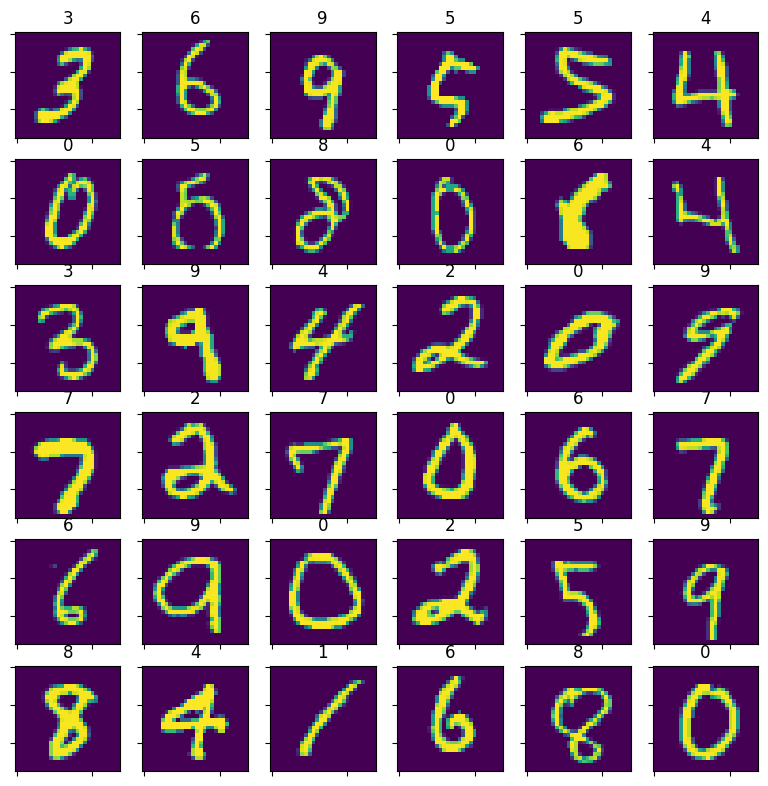

In [8]:
h = 6
w = 6
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(0, X_train.shape[0])
    predicted_label = np.argmax(y_train[ex])
    axs[i,j].set_title(nombres[predicted_label])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(X_train[ex].reshape(28, 28))

In [9]:
numimagen = np.sum(y_train, axis=0)

for i in range(10):
    print(f"Cantidad de imágenes del número {i}: {numimagen[i]}")

Cantidad de imágenes del número 0: 5923.0
Cantidad de imágenes del número 1: 6742.0
Cantidad de imágenes del número 2: 5958.0
Cantidad de imágenes del número 3: 6131.0
Cantidad de imágenes del número 4: 5842.0
Cantidad de imágenes del número 5: 5421.0
Cantidad de imágenes del número 6: 5918.0
Cantidad de imágenes del número 7: 6265.0
Cantidad de imágenes del número 8: 5851.0
Cantidad de imágenes del número 9: 5949.0


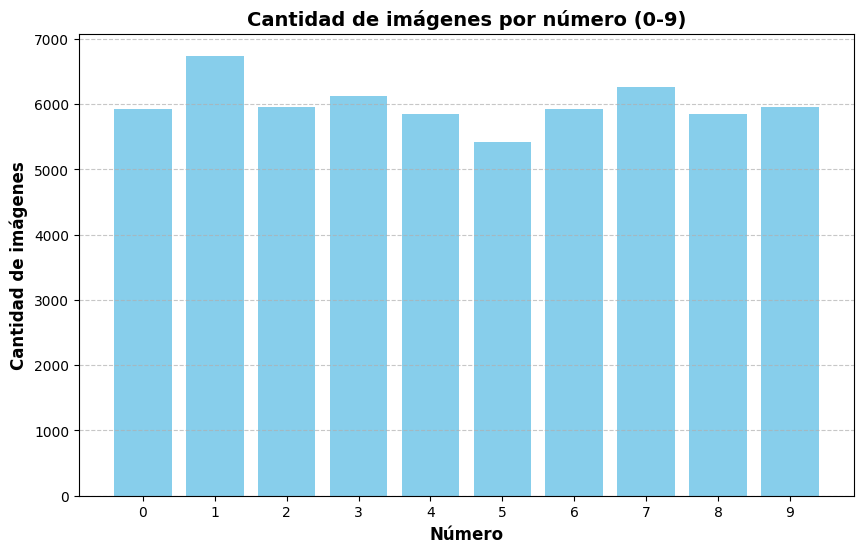

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(numimagen)), numimagen, color='skyblue')
plt.title('Cantidad de imágenes por número (0-9)', fontsize=14, fontweight="bold")
plt.xlabel('Número', fontsize=12, fontweight="bold")
plt.ylabel('Cantidad de imágenes', fontsize=12, fontweight="bold")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(10))
plt.show()

Las imágenes del dataset están relativamente balanceadas entre las 10 clases. La clase con más ejemplos es el número 1 (6742 imágenes) y la que menos tiene es el número 5 (5421 imágenes). Aunque hay pequeñas diferencias, la distribución es lo suficientemente equilibrada como para entrenar modelos sin riesgo significativo de sesgo hacia una clase específica.

1. explicacion m,n,c
2. explicacion seed
3. explicacion cantidad de capas ocupltas y su valor
4. cantidad de epocas
5. explicacion de funcion loss (si categorical_crossentropy no binary_corss)
5. eleccion de optimizadores (sgd y adam)
6. eleccion de avticadores con sus ventajas (relu y elu)
6. con activacion (relu)
7. vs con avticacion (elu)
8. explicaion de comparacion de fun activacion
9. cambio bachsize y explicacion
10. cambio epocas y explicacion
11. drop out
12. comparacion mejor modelo sin regulacion y con


#Entrenamiento y ajuste de hiperparámetros

## Explicación M, N y C

In [11]:
M = X_train.shape[0]
N = X_train.shape[1]
C = y_train.shape[1]
print(M,N,C)

60000 784 10


*COMENTARIO

## Explicación Seed

In [12]:
# Setea los seed para números random
np.random.seed(29)
tf.random.set_seed(29)

El propósito principal de establecer las semillas de los generadores de números aleatorios es permitir la reproducibilidad del código. Al fijar estas semillas, se asegura que cualquier persona que ejecute este código bajo las mismas condiciones (misma versión de librerías, hardware, etc.) obtendrá los mismos resultados. Esto es fundamental para la investigación científica, ya que permite validar resultados y compararlos en diferentes pruebas.

## Explicacion cantidad de capas ocupltas y su valor

In [13]:
h1 = 512
h2 = 256
h3 = 128

## Explicacion epocas y batch size inicial

epocas de 10 pq nose y batch size de 32 pq nose

## Explicación de función de perdida (loss) (si categorical_crossentropy no binary_corss)

no se puede ocupar pq binary es bisexual

## Explicacion de acticador softmax en capa de salida y pq no puede ser otro

POR QUE NO NOMAS PU QUE WEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

##EZPLICACION DE METRICAS PARA EVALUAR LOS MODELOS

SI SE QUE ESCRIBI EZPLICACION Y NO EXPLICaCION

# Experimento 1: Optimizador SGD

## Activadores (Relu y Elu)

Explicacion de la funcion de activador y recalcal el de la salida el softmax

### Relu

In [14]:
red_relu = keras.Sequential(name="Red_relu")
red_relu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_relu.add(keras.layers.Dense(h1, activation='relu',name='primera_capa'))
red_relu.add(keras.layers.Dense(h2, activation='relu',name='segunda_capa'))
red_relu.add(keras.layers.Dense(h3, activation='relu',name='tercera_capa'))
red_relu.add(keras.layers.Dense(C, activation='softmax',name='capa_salida'))

red_relu.summary()

Model: "Red_relu"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tercera_capa (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_salida (Dense)             │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

#Explicacion del sumary, ###Oye agregamos el sumary en TODOS los cambios? lo encuentro inutil pq nunca cambiamos la cantidad de capas o la cantidad de neuronas

En la primera capa oculta tiene 512 neuronas, las cuales se multiplican por el valor de las imagen aplanadas 784 (28x28). Los 401,920 parámetros vienen de: 784*512 pesos + 512 sesgos

La segunda capa oculta. Tiene 256 neuronas. Los parámetros son: 512*256 + 256

La tercera capa oculta con 128 neuronas: 256*128 + 128

 La capa de salida con 10 neuronas (las 10 etiquetas 0-9). Parámetros: 128*10 + 10

In [17]:
red_relu.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_relu = red_relu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

red_relu.save("red_relu.keras")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9928 - loss: 0.0320 - val_accuracy: 0.9752 - val_loss: 0.0811
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9934 - loss: 0.0298 - val_accuracy: 0.9759 - val_loss: 0.0803
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9942 - loss: 0.0268 - val_accuracy: 0.9762 - val_loss: 0.0795
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9949 - loss: 0.0240 - val_accuracy: 0.9763 - val_loss: 0.0787
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9961 - loss: 0.0215 - val_accuracy: 0.9768 - val_loss: 0.0785
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9967 - loss: 0.0193 - val_accuracy: 0.9770 - val_loss: 0.0780
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9973 - loss: 0.0172 - val_accuracy: 0.9771 - val_loss: 0.0781
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9978 - loss: 0

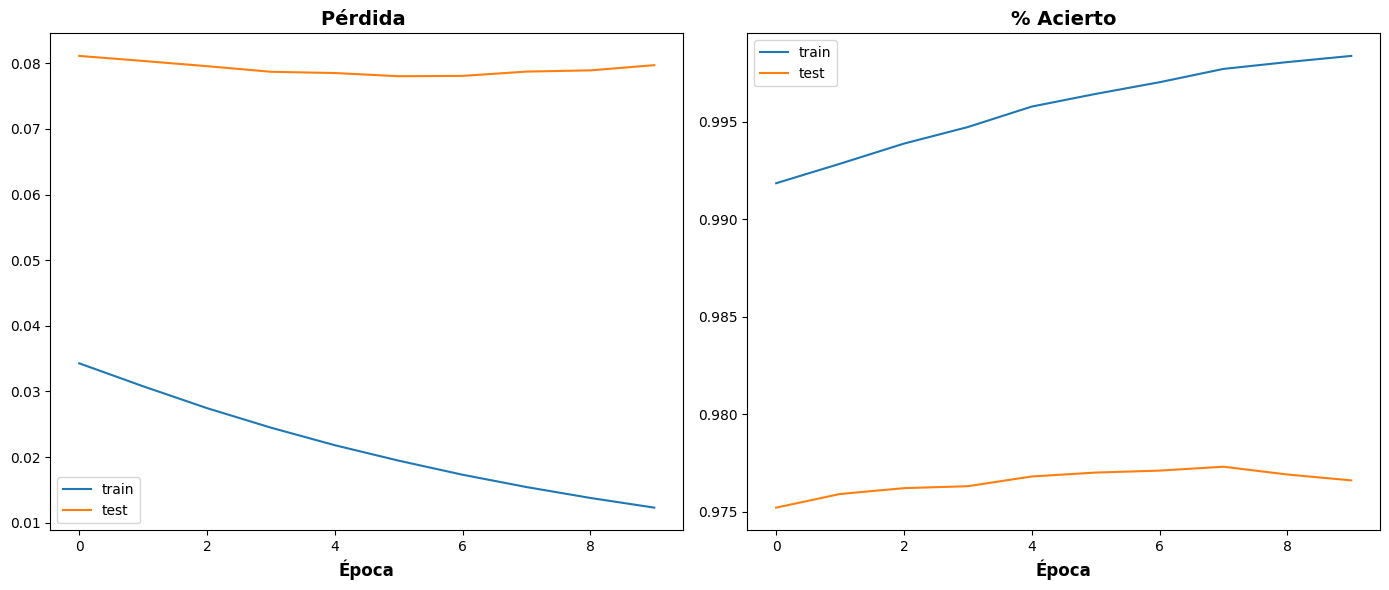

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_relu.history['loss'], label="train")
axs[0].plot(hist_relu.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_relu.history['accuracy'], label="train")
axs[1].plot(hist_relu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


*COMENTARIO

### Elu

In [19]:
red_elu = keras.Sequential(name="red_elu")
red_elu.add(keras.layers.Input(shape=(N,), name='entrada'))
red_elu.add(keras.layers.Dense(h1, activation='elu'))
red_elu.add(keras.layers.Dense(h2, activation='elu'))
red_elu.add(keras.layers.Dense(h3, activation='elu'))
red_elu.add(keras.layers.Dense(C, activation='softmax'))

red_elu.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_elu = red_elu.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

red_elu.save("red_elu.keras")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8190 - loss: 0.6815 - val_accuracy: 0.9149 - val_loss: 0.2891
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9187 - loss: 0.2810 - val_accuracy: 0.9293 - val_loss: 0.2396
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9319 - loss: 0.2319 - val_accuracy: 0.9401 - val_loss: 0.2033
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9435 - loss: 0.1956 - val_accuracy: 0.9470 - val_loss: 0.1780
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9514 - loss: 0.1698 - val_accuracy: 0.9527 - val_loss: 0.1605
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9567 - loss: 0.1505 - val_accuracy: 0.9566 - val_loss: 0.1476
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9606 - loss: 0.1351 - val_accuracy: 0.9587 - val_loss: 0.1374
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9646 - loss: 0

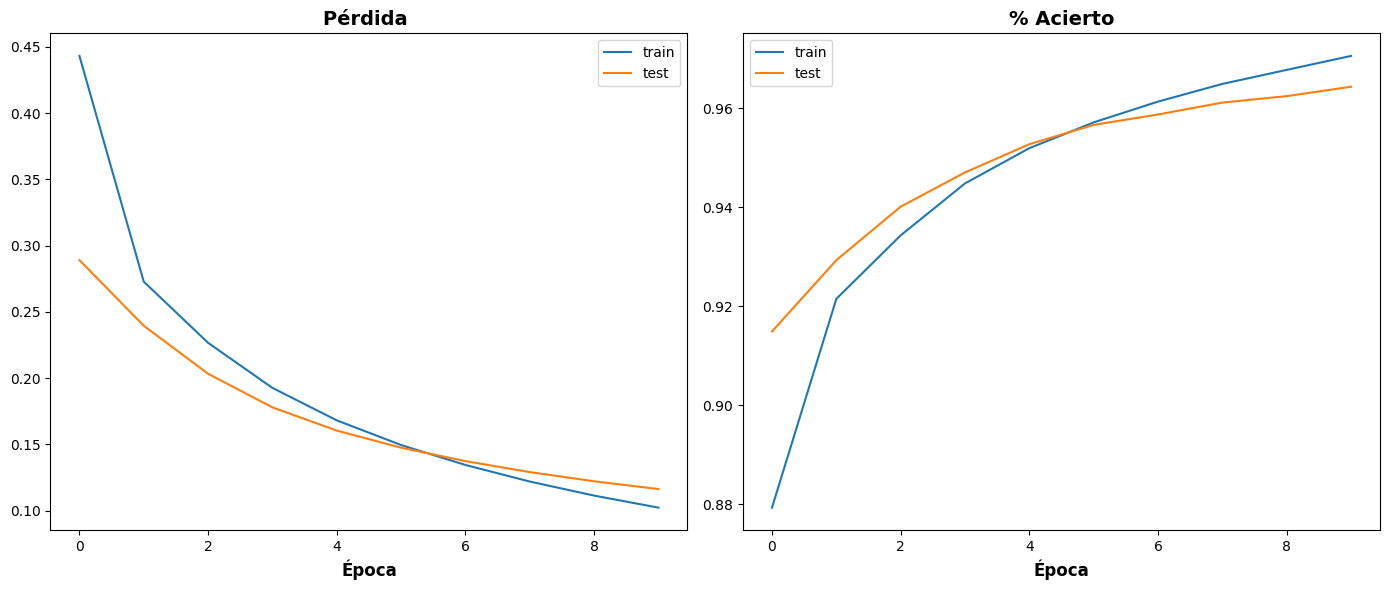

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_elu.history['loss'], label="train")
axs[0].plot(hist_elu.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_elu.history['accuracy'], label="train")
axs[1].plot(hist_elu.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


#CONCLUSIONES RELU VS ELU

In [28]:
relu_vs_elu = {
    'Métrica': list(hist_relu.history.keys()),
    'hist_relu': [hist_relu.history[k][-1] for k in hist_relu.history],
    'hist_elu': [hist_elu.history[k][-1] for k in hist_elu.history]
}

df = pd.DataFrame(relu_vs_elu)

display(df)

,Métrica,hist_relu,hist_elu
0,accuracy,0.998383,0.970517
1,loss,0.012298,0.102366
2,val_accuracy,0.976600,0.964300
3,val_loss,0.079707,0.116368


ReLU mostró una alta precisión en entrenamiento (0.9983) y una buena generalización en validación (0.9766), con una rápida convergencia (loss bajo). Sin embargo, existe el riesgo de "neuronas muertas", lo que puede afectar el aprendizaje en redes más profundas o con pesos mal inicializados.

ELU, en cambio, obtuvo resultados algo inferiores en ambas métricas (accuracy de 0.9705 en entrenamiento y 0.9643 en validación), con un mayor valor de pérdida, lo que indica una convergencia más lenta o menos eficiente. No obstante, su capacidad de producir salidas negativas ayuda a evitar el problema de las neuronas muertas, lo cual puede ser beneficioso en ciertos contextos o arquitecturas.

En resumen, ReLU se comportó mejor en este caso específico, pero ELU podría ofrecer ventajas en modelos más complejos o con problemas de desactivación de neuronas.

Ya que nuestro set de dato es simple nos eligirimos la funcion ReLU como funcion activadora para los siguientes cambios.

## Cambio batch size

### Batch size de 64

In [29]:
red_batch64 = keras.Sequential(name="relu_bs_64")
red_batch64.add(keras.layers.Input(shape=(N,), name='entrada'))
red_batch64.add(keras.layers.Dense(h1, activation='relu'))
red_batch64.add(keras.layers.Dense(h2, activation='relu'))
red_batch64.add(keras.layers.Dense(h3, activation='relu'))
red_batch64.add(keras.layers.Dense(C, activation='softmax'))

red_batch64.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_batch64 = red_batch64.fit(X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,y_test)
       )
red_batch64.save("red_batch64.keras")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6576 - loss: 1.2946 - val_accuracy: 0.9019 - val_loss: 0.3499
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9086 - loss: 0.3293 - val_accuracy: 0.9243 - val_loss: 0.2636
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9250 - loss: 0.2596 - val_accuracy: 0.9337 - val_loss: 0.2239
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9369 - loss: 0.2213 - val_accuracy: 0.9417 - val_loss: 0.1967
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9454 - loss: 0.1933 - val_accuracy: 0.9488 - val_loss: 0.1760
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9509 - loss: 0.1714 - val_accuracy: 0.9535 - val_loss: 0.1597
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9569 - loss: 0.1536 - val_accuracy: 0.9570 - val_loss: 0.1467
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9613 - loss: 0.1388 - val_accuracy

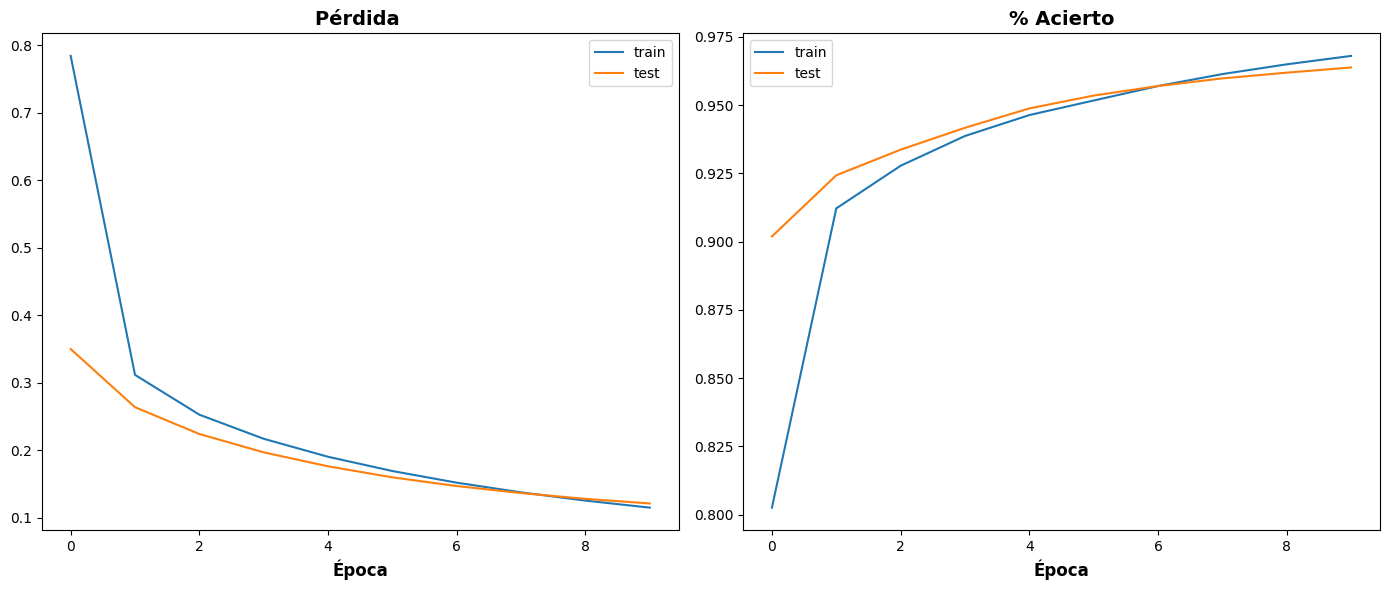

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_batch64.history['loss'], label="train")
axs[0].plot(hist_batch64.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_batch64.history['accuracy'], label="train")
axs[1].plot(hist_batch64.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


### Batch size de 256

In [32]:
red_batch256 = keras.Sequential(name="batch256")
red_batch256.add(keras.layers.Input(shape=(N,), name='entrada'))
red_batch256.add(keras.layers.Dense(h1, activation='relu'))
red_batch256.add(keras.layers.Dense(h2, activation='relu'))
red_batch256.add(keras.layers.Dense(h3, activation='relu'))
red_batch256.add(keras.layers.Dense(C, activation='softmax'))

red_batch256.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_batch256 = red_batch256.fit(X_train, y_train,
        epochs=10,
        batch_size=256,
        validation_data=(X_test,y_test)
       )
red_batch256.save("red_batch256.keras")

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.3781 - loss: 2.0048 - val_accuracy: 0.8183 - val_loss: 0.8969
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8321 - loss: 0.7583 - val_accuracy: 0.8772 - val_loss: 0.4894
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8794 - loss: 0.4701 - val_accuracy: 0.8938 - val_loss: 0.3867
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8957 - loss: 0.3840 - val_accuracy: 0.9067 - val_loss: 0.3395
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9049 - loss: 0.3408 - val_accuracy: 0.9129 - val_loss: 0.3107
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9107 - loss: 0.3129 - val_accuracy: 0.9181 - val_loss: 0.2900
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9158 - loss: 0.2924 - val_accuracy: 0.9235 - val_loss: 0.2739
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9209 - loss: 0.2759 - val_accu

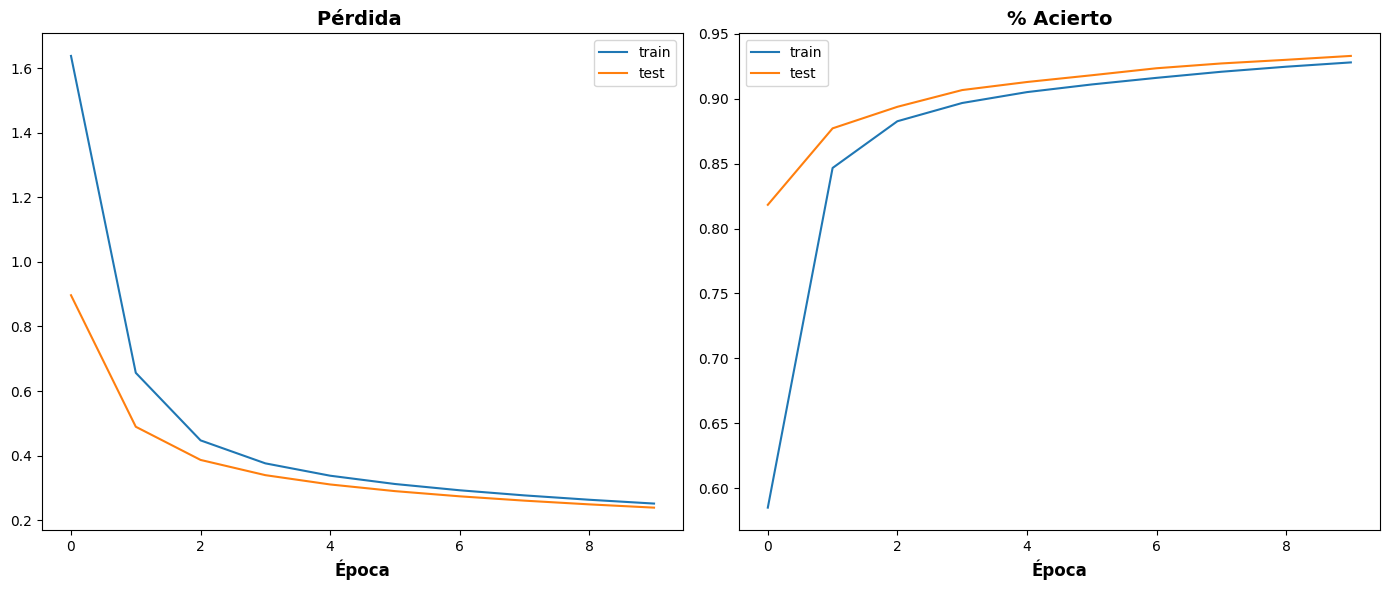

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_batch256.history['loss'], label="train")
axs[0].plot(hist_batch256.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_batch256.history['accuracy'], label="train")
axs[1].plot(hist_batch256.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


In [33]:
Batch_size_vs = {
    'Métrica': list(hist_relu.history.keys()),
    'batch size = 32': [hist_relu.history[k][-1] for k in hist_relu.history],
    'batch size = 64': [hist_batch64.history[k][-1] for k in hist_batch64.history],
    'batch size = 256': [hist_batch256.history[k][-1] for k in hist_batch256.history],
}

df_batch = pd.DataFrame(Batch_size_vs)

display(df_batch)

,Métrica,batch size = 32,batch size = 64,batch size = 256
0,accuracy,0.998383,0.968033,0.928000
1,loss,0.012298,0.114751,0.251487
2,val_accuracy,0.976600,0.963800,0.933000
3,val_loss,0.079707,0.120949,0.238870


El batch size más pequeño (32) produjo los mejores resultados tanto en entrenamiento como en validación. Tiene la mayor accuracy y val_accuracy, y las menores loss y val_loss A medida que el batch size aumenta, el rendimiento empeora:

La precisión (accuracy y val_accuracy) disminuye.

La pérdida (loss y val_loss) aumenta notablemente.

Batch sizes pequeños tienden a proporcionar un aprendizaje con mejores metricas (accuracy y perdida), ###al introducir más ruido estocástico que puede ayudar a salir de mínimos locales.

En cambio, batch sizes grandes pueden hacer que el modelo converja más rápido, pero a veces a soluciones menos óptimas. Pero batch sizes grandes pueden reducir el sobreentrenamiento, y se ve reflejado en la diferencia de accuracy y su validacion Batch size 32	con una diferencia de 0.0218, batch size de 64 con un diferencia de 0.0042 y batch size de 256 con una diferencia de 0.0050.

En conclucion:

Batch size pequeño (32): aprende muy bien, pero también tiende a memorizar más el entrenamiento con mayor riesgo de overfitting.

Batch size grande (256): aprende de forma más "estable", menos overfitting, pero también menor rendimiento o errores mas grandes

Ya que el sobre entrenmiento en nuestro caso no es tan grande nos quedaremos con un batch size de 32 ya que la perdida o el error es mucho mas bajo que los demas tamaños.

## Cambio de epochs

In [34]:
red_epoca = keras.Sequential(name="Mi_Red")
red_epoca.add(keras.layers.Input(shape=(N,), name='entrada'))
red_epoca.add(keras.layers.Dense(h1, activation='relu'))
red_epoca.add(keras.layers.Dense(h2, activation='relu'))
red_epoca.add(keras.layers.Dense(h3, activation='relu'))
red_epoca.add(keras.layers.Dense(C, activation='softmax'))

red_epoca.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_epoca = red_epoca.fit(X_train, y_train,
        epochs=30,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
red_epoca.save("red_epoca.keras")

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7360 - loss: 0.9832 - val_accuracy: 0.9221 - val_loss: 0.2656
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9258 - loss: 0.2552 - val_accuracy: 0.9404 - val_loss: 0.1999
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9429 - loss: 0.1940 - val_accuracy: 0.9514 - val_loss: 0.1655
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9549 - loss: 0.1565 - val_accuracy: 0.9565 - val_loss: 0.1432
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9627 - loss: 0.1301 - val_accuracy: 0.9616 - val_loss: 0.1278
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9686 - loss: 0.1104 - val_accuracy: 0.9644 - val_loss: 0.1169
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9730 - loss: 0.0951 - val_accuracy: 0.9659 - val_loss: 0.1088
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9772 - loss: 0

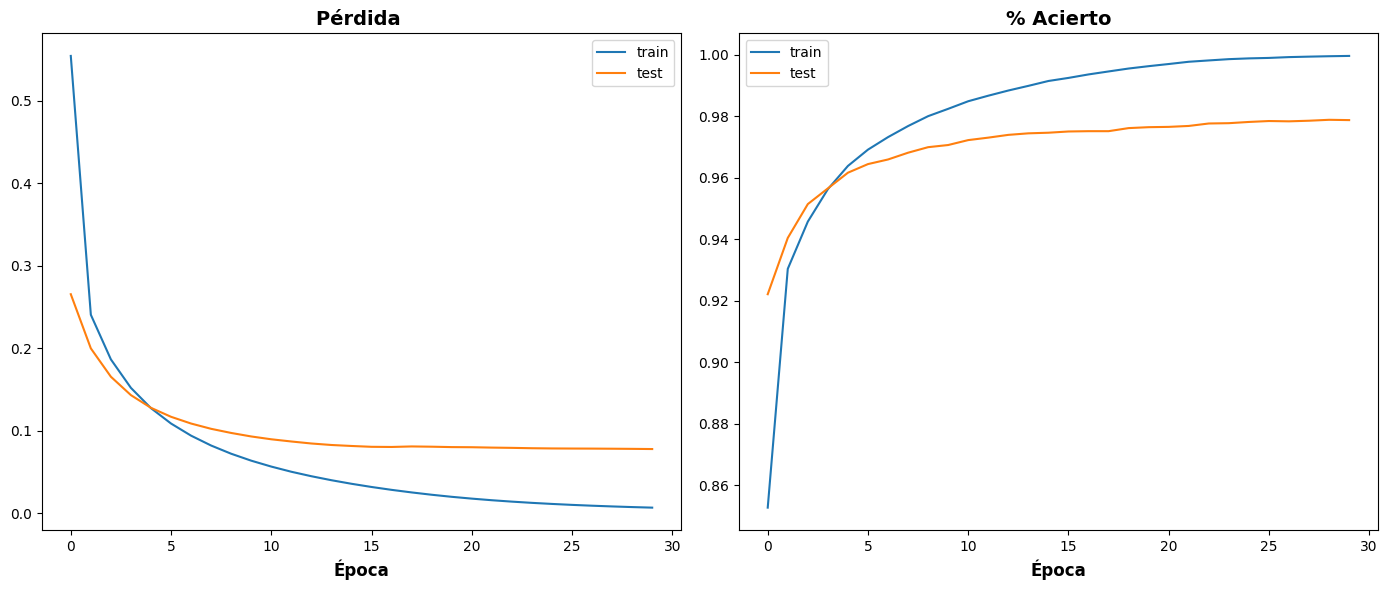

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_epoca.history['loss'], label="train")
axs[0].plot(hist_epoca.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_epoca.history['accuracy'], label="train")
axs[1].plot(hist_epoca.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

In [37]:
Epoca_vs = {
    'Métrica': list(hist_relu.history.keys()),
    'Epoca = 10': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Epoca = 30': [hist_epoca.history[k][-1] for k in hist_epoca.history],
    #'Epoca = 50': [.history[k][-1] for k in .history],
}

df_epoca = pd.DataFrame(Epoca_vs)

display(df_epoca)

,Métrica,Epoca = 10,Epoca = 30
0,accuracy,0.998383,0.999567
1,loss,0.012298,0.006757
2,val_accuracy,0.976600,0.978700
3,val_loss,0.079707,0.077821


Al aumentar las épocas de entrenamiento de 10 a 30, se observa una mejora general en todas las métricas.

El modelo logra una mayor precisión tanto en entrenamiento como en validación:

accuracy: sube ligeramente de 0.9984 → 0.9996

val_accuracy: también mejora, aunque de forma más modesta (0.9766 → 0.9787)

La pérdida (loss) disminuye en ambos conjuntos:

loss: se reduce casi a la mitad (0.0123 → 0.0068)

val_loss: también mejora, aunque de manera leve (0.0797 → 0.0778)

¡Buena pregunta! Aumentar la cantidad de épocas puede mejorar el rendimiento, pero también tiene costos y riesgos que vale la pena considerar. Te los explico:

⚖️ Costos de usar más épocas
1. 🕒 Mayor tiempo de entrenamiento
Cada época significa pasar una vez por todo el conjunto de datos, así que más épocas = más tiempo.

Esto puede ser costoso si:

El dataset es grande

Estás probando muchas configuraciones

Usas hardware limitado

2. 🧠 Riesgo de sobreentrenamiento (overfitting)
A partir de cierto punto, el modelo memoriza el conjunto de entrenamiento en vez de aprender a generalizar.

Esto se nota cuando:

accuracy sigue subiendo

pero val_accuracy se estanca o baja

y val_loss comienza a subir

En tu tabla, no se ve sobreentrenamiento aún, pero si entrenaras 100 épocas podrías empezar a verlo.

3. 💰 Mayor consumo de recursos
Más uso de GPU/CPU

Más energía (si entrenas en cloud, más costos)

Mayor desgaste de hardware si haces muchos ciclos largos

##Cambio numero de capas

In [41]:
red_capa4 = keras.Sequential(name="Red_4capas")
red_capa4.add(keras.layers.Input(shape=(N,), name='entrada'))
red_capa4.add(keras.layers.Dense(h1, activation='relu'))
red_capa4.add(keras.layers.Dense(h1, activation='relu'))
red_capa4.add(keras.layers.Dense(h2, activation='relu'))
red_capa4.add(keras.layers.Dense(h3, activation='relu'))
red_capa4.add(keras.layers.Dense(C, activation='softmax'))

red_capa4.summary()

Model: "Mi_Red"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 830,090 (3.17 MB)

 Trainable params: 830,090 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

####PREGUNTAR A LA PROFE SI O SI EL TAMAÑO DE NEURONA IENE QUE BAJAR; YO RENIA ENTENDIDO QUE NO Y SI SE PUEDE REPERTIR VALOR

In [40]:
red_capa4.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_capa4 = red_capa4.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )
red_capa4.save("red_capa4.keras")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9902 - loss: 0.0388 - val_accuracy: 0.9758 - val_loss: 0.0828
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9915 - loss: 0.0331 - val_accuracy: 0.9758 - val_loss: 0.0824
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9932 - loss: 0.0282 - val_accuracy: 0.9755 - val_loss: 0.0832
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9950 - loss: 0.0239 - val_accuracy: 0.9757 - val_loss: 0.0852
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9963 - loss: 0.0201 - val_accuracy: 0.9755 - val_loss: 0.0878
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9973 - loss: 0.0169 - val_accuracy: 0.9749 - val_loss: 0.0899
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9980 - loss: 0.0143 - val_accuracy: 0.9749 - val_loss: 0.0913
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9983 - los

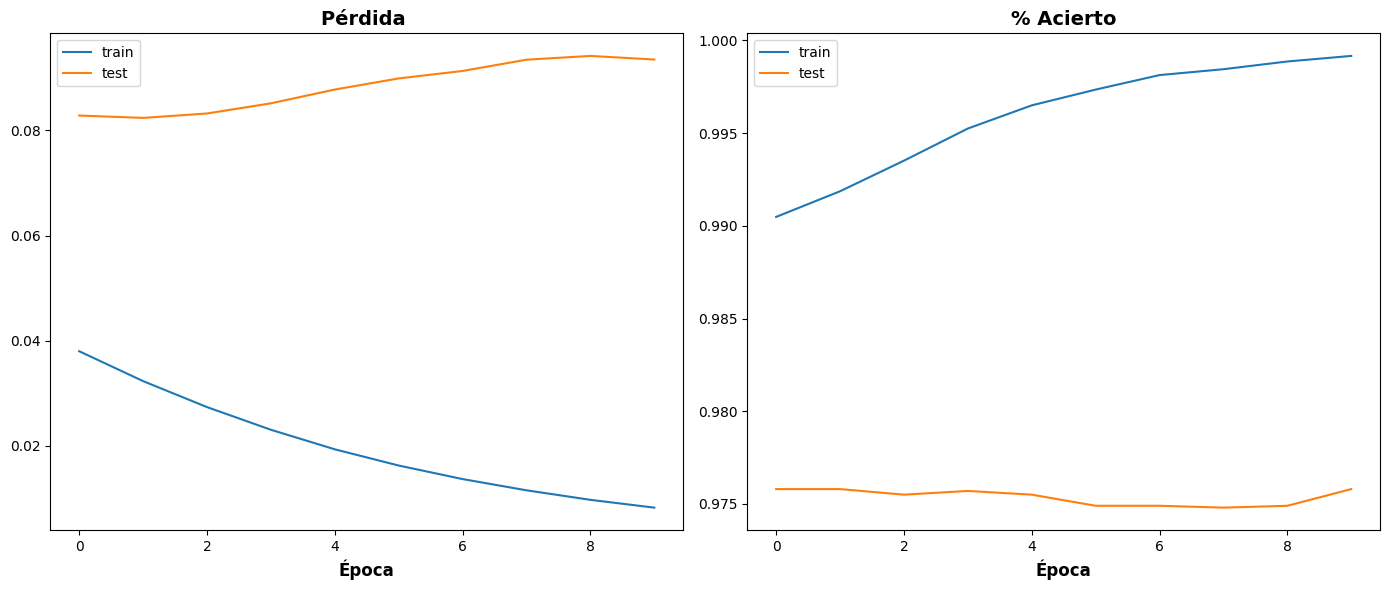

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_capa4.history['loss'], label="train")
axs[0].plot(hist_capa4.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_capa4.history['accuracy'], label="train")
axs[1].plot(hist_capa4.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

In [44]:
Capas_vs = {
    'Métrica': list(hist_relu.history.keys()),
    'Capas = 3': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Capas = 4': [hist_capa4.history[k][-1] for k in hist_capa4.history]
}

df_capas = pd.DataFrame(Capas_vs)

display(df_capas)

,Métrica,Capas = 3,Capas = 4
0,accuracy,0.998383,0.999167
1,loss,0.012298,0.008260
2,val_accuracy,0.976600,0.975800
3,val_loss,0.079707,0.093497


## Agregación de regulación (drop-out)

In [50]:
red_dropout = keras.Sequential(name="red_dropout")
red_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
red_dropout.add(keras.layers.Dense(h1, activation='relu'))
#
red_dropout.add(keras.layers.Dense(30, activation='relu'))
red_dropout.add(keras.layers.Dropout(0.3))
red_dropout.add(keras.layers.Dense(20, activation='relu'))
#
red_dropout.add(keras.layers.Dense(h2, activation='relu'))
red_dropout.add(keras.layers.Dense(h3, activation='relu'))
red_dropout.add(keras.layers.Dense(C, activation='softmax'))

red_dropout.summary()

Model: "red_dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 30)             │        15,390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 256)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 457,492 (1.75 MB)

 Trainable params: 457,492 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
red_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_dropout = red_dropout.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3167 - loss: 1.9391 - val_accuracy: 0.8871 - val_loss: 0.4044
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8435 - loss: 0.5104 - val_accuracy: 0.9259 - val_loss: 0.2503
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.8952 - loss: 0.3453 - val_accuracy: 0.9441 - val_loss: 0.1930
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9192 - loss: 0.2668 - val_accuracy: 0.9558 - val_loss: 0.1519
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9361 - loss: 0.2159 - val_accuracy: 0.9600 - val_loss: 0.1328
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9450 - loss: 0.1818 - val_accuracy: 0.9650 - val_loss: 0.1196
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9511 - loss: 0.1601 - val_accuracy: 0.9686 - val_loss: 0.1086
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9574 - loss: 

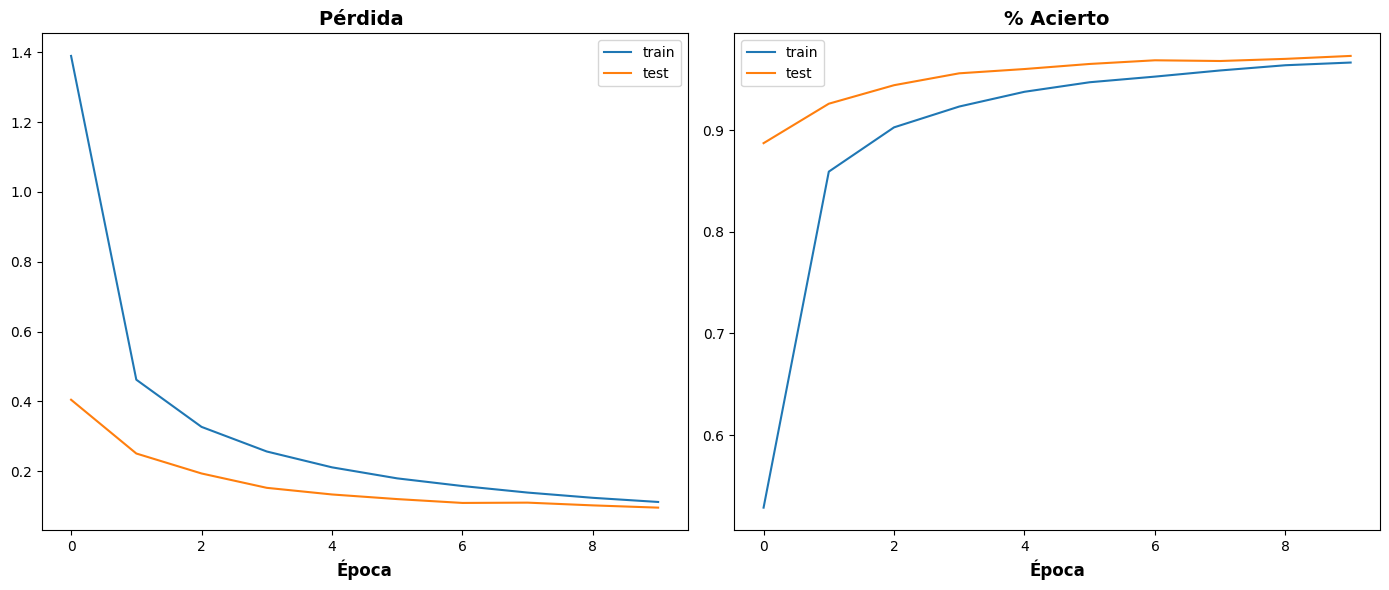

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_dropout.history['loss'], label="train")
axs[0].plot(hist_dropout.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_dropout.history['accuracy'], label="train")
axs[1].plot(hist_dropout.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


In [53]:
Dropout_vs = {
    'Métrica': list(hist_relu.history.keys()),
    'Sin DropOut': [hist_relu.history[k][-1] for k in hist_relu.history],
    'Con DropOut': [hist_dropout.history[k][-1] for k in hist_dropout.history]
}

df_dropout = pd.DataFrame(Dropout_vs)

display(df_dropout)

,Métrica,Sin DropOut,Con DropOut
0,accuracy,0.998383,0.966383
1,loss,0.012298,0.111348
2,val_accuracy,0.976600,0.972900
3,val_loss,0.079707,0.095088


# Experimento 2: Optimizador Adam

## Activadores (Relu y Elu)

### Relu

In [ ]:
red_relu_adam = keras.Sequential(name="Mi_Red")
red_relu_adam.add(keras.layers.Input(shape=(N,), name='entrada'))
red_relu_adam.add(keras.layers.Dense(h1, activation='relu'))
red_relu_adam.add(keras.layers.Dense(h2, activation='relu'))
red_relu_adam.add(keras.layers.Dense(h3, activation='relu'))
red_relu_adam.add(keras.layers.Dense(C, activation='softmax'))

red_relu_adam.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_relu_adam = red_relu_adam.fit(X_train, y_train,
        epochs=10,
        batch_size=1,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.2962 - accuracy: 0.9241 - val_loss: 0.2018 - val_accuracy: 0.9556
Epoch 2/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.2007 - accuracy: 0.9544 - val_loss: 0.2255 - val_accuracy: 0.9528
Epoch 3/10
60000/60000 [==============================] - 208s 3ms/step - loss: 0.1779 - accuracy: 0.9619 - val_loss: 0.1587 - val_accuracy: 0.9688
Epoch 4/10
60000/60000 [==============================] - 223s 4ms/step - loss: 0.1896 - accuracy: 0.9650 - val_loss: 0.3296 - val_accuracy: 0.9541
Epoch 5/10
60000/60000 [==============================] - 202s 3ms/step - loss: 0.1757 - accuracy: 0.9659 - val_loss: 0.1987 - val_accuracy: 0.9611
Epoch 6/10
60000/60000 [==============================] - 246s 4ms/step - loss: 0.1887 - accuracy: 0.9666 - val_loss: 0.3332 - val_accuracy: 0.9581
Epoch 7/10
60000/60000 [==============================] - 222s 4ms/step - loss: 0.1956 - accuracy: 0.9664 - val_

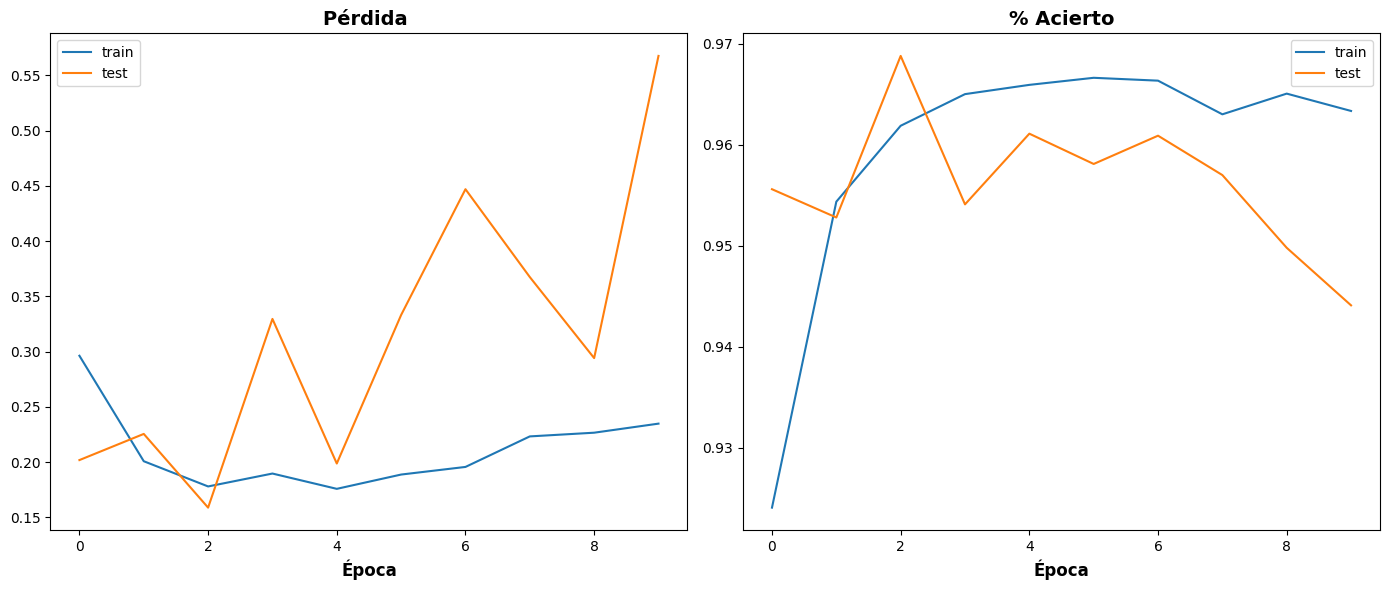

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#axs.set_title('Activadores (Relu y Elu)', fontsize=14, fontweight="bold")

axs[0].plot(hist_relu_adam.history['loss'], label="train")
axs[0].plot(hist_relu_adam.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_relu_adam.history['accuracy'], label="train")
axs[1].plot(hist_relu_adam.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()


# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


### ELU

In [ ]:
red_elu_adam = keras.Sequential(name="Mi_Red")
red_elu_adam.add(keras.layers.Input(shape=(N,), name='entrada'))
red_elu_adam.add(keras.layers.Dense(h1, activation='elu'))
red_elu_adam.add(keras.layers.Dense(h2, activation='elu'))
red_elu_adam.add(keras.layers.Dense(h3, activation='elu'))
red_elu_adam.add(keras.layers.Dense(C, activation='softmax'))

red_elu_adam.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Increased batch size to speed up training and avoid keyboard interrupt
hist_elu_adam = red_elu_adam.fit(X_train, y_train,
        epochs=10,
        batch_size=64,  # Changed from 1 to 64 to speed up training
        validation_data=(X_test,y_test)
       )

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2319 - accuracy: 0.9302 - val_loss: 0.1452 - val_accuracy: 0.9571
Epoch 2/10
938/938 [==============================] - 8s 9ms/step - loss: 0.1113 - accuracy: 0.9652 - val_loss: 0.1063 - val_accuracy: 0.9657
Epoch 3/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0799 - accuracy: 0.9747 - val_loss: 0.0830 - val_accuracy: 0.9749
Epoch 4/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.1134 - val_accuracy: 0.9668
Epoch 5/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0527 - accuracy: 0.9830 - val_loss: 0.0725 - val_accuracy: 0.9791
Epoch 6/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.0922 - val_accuracy: 0.9768
Epoch 7/10
938/938 [==============================] - 8s 9ms/step - loss: 0.0390 - accuracy: 0.9870 - val_loss: 0.1008 - val_accuracy: 0.9745
Epoc

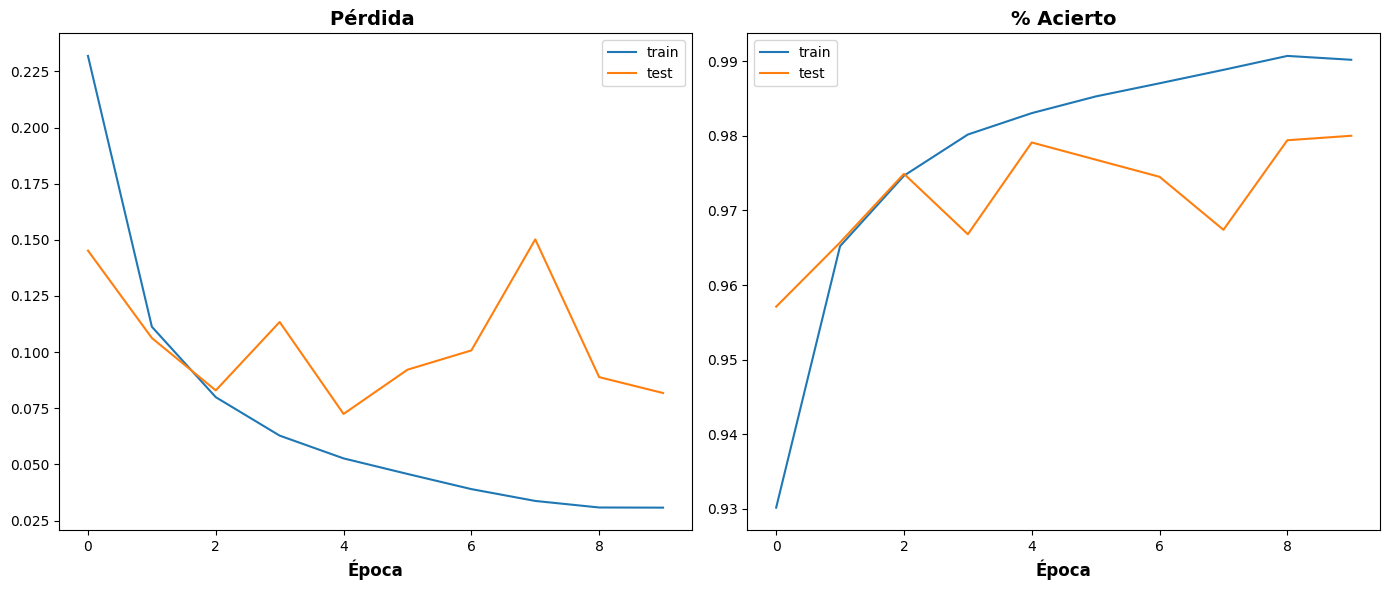

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_elu_adam.history['loss'], label="train")
axs[0].plot(hist_elu_adam.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_elu_adam.history['accuracy'], label="train")
axs[1].plot(hist_elu_adam.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()


# #

# Cambio Batch Size

# Cambio Batch Size de 32


In [ ]:
red_adam_batch32 = keras.Sequential(name="Mi_Red")
red_adam_batch32.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_batch32.add(keras.layers.Dense(h1, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(h2, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(h3, activation='relu'))
red_adam_batch32.add(keras.layers.Dense(C, activation='softmax'))

red_adam_batch32.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_batch32 = red_adam_batch32.fit(X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1942 - accuracy: 0.9415 - val_loss: 0.1263 - val_accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0881 - accuracy: 0.9736 - val_loss: 0.0897 - val_accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.0763 - val_accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0794 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0379 - accuracy: 0.9879 - val_loss: 0.0743 - val_accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0714 - val_accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0837 - val_acc

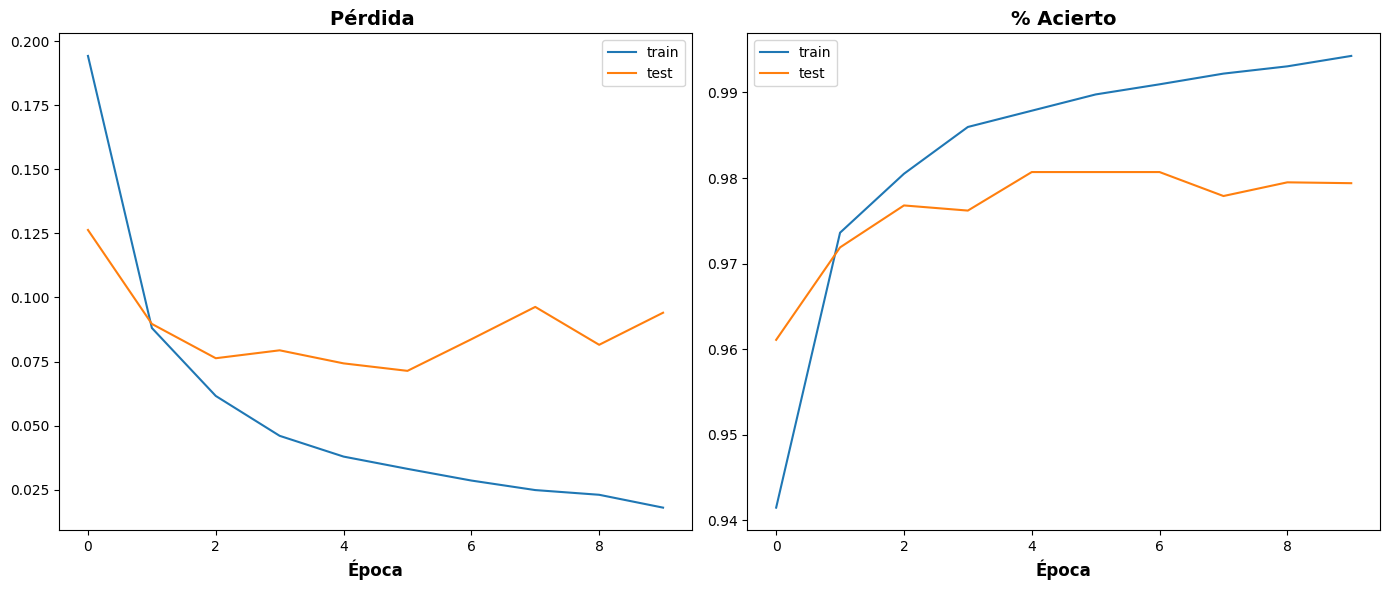

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_batch32.history['loss'], label="train")
axs[0].plot(hist_adam_batch32.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_batch32.history['accuracy'], label="train")
axs[1].plot(hist_adam_batch32.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()



## Cambio Batch Size de 64

In [ ]:
red_adam_batch64 = keras.Sequential(name="Mi_Red")
red_adam_batch64.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_batch64.add(keras.layers.Dense(h1, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(h2, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(h3, activation='relu'))
red_adam_batch64.add(keras.layers.Dense(C, activation='softmax'))

red_adam_batch64.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_batch64 = red_adam_batch64.fit(X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_test,y_test)
       )

Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2062 - accuracy: 0.9386 - val_loss: 0.1402 - val_accuracy: 0.9518
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0832 - accuracy: 0.9740 - val_loss: 0.0943 - val_accuracy: 0.9698
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0576 - accuracy: 0.9816 - val_loss: 0.0792 - val_accuracy: 0.9761
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0438 - accuracy: 0.9864 - val_loss: 0.0830 - val_accuracy: 0.9753
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0358 - accuracy: 0.9884 - val_loss: 0.0858 - val_accuracy: 0.9750
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0939 - val_accuracy: 0.9760
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0779 - val_accuracy: 0.9797
Epoch 

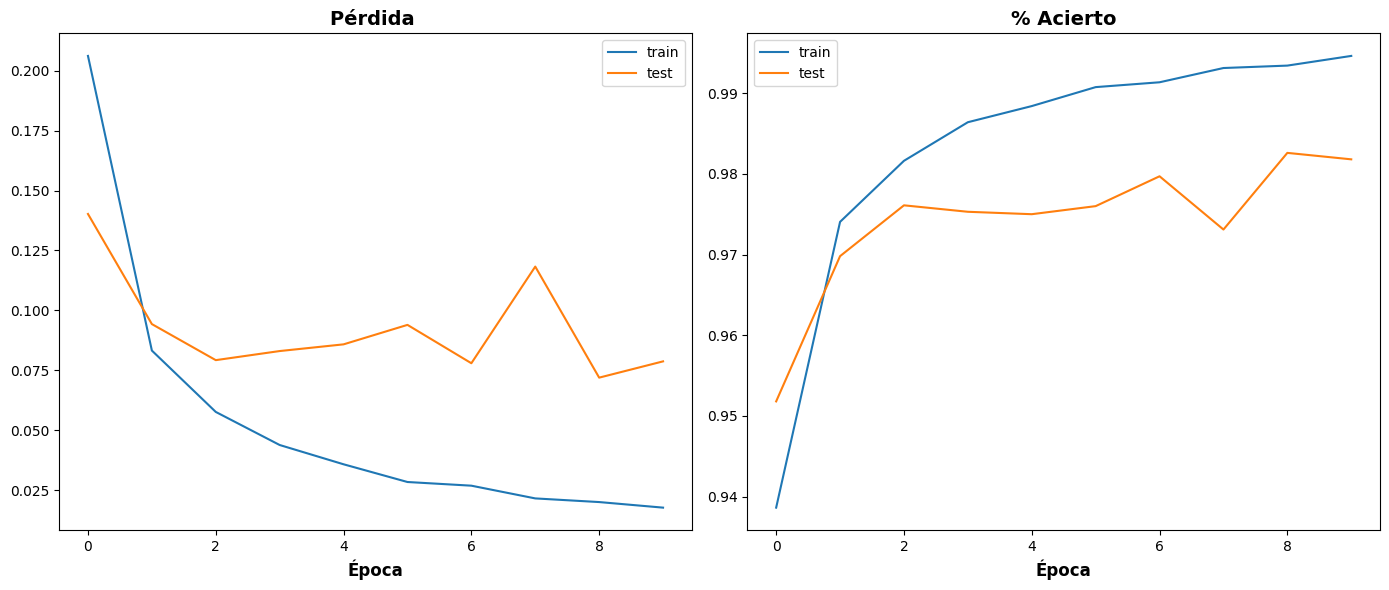

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_batch64.history['loss'], label="train")
axs[0].plot(hist_adam_batch64.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_batch64.history['accuracy'], label="train")
axs[1].plot(hist_adam_batch64.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

## Cambio de epocas

In [ ]:
red_adam_epoca = keras.Sequential(name="Mi_Red")
red_adam_epoca.add(keras.layers.Input(shape=(N,), name='entrada'))
red_adam_epoca.add(keras.layers.Dense(h1, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(h2, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(h3, activation='relu'))
red_adam_epoca.add(keras.layers.Dense(C, activation='softmax'))

red_adam_epoca.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

hist_adam_epoca = red_adam_epoca.fit(X_train, y_train,
        epochs=30,
        batch_size=64,
        validation_data=(X_test,y_test)
       )

Epoch 1/30
938/938 [==============================] - 7s 6ms/step - loss: 0.2075 - accuracy: 0.9380 - val_loss: 0.1532 - val_accuracy: 0.9523
Epoch 2/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0849 - accuracy: 0.9735 - val_loss: 0.0916 - val_accuracy: 0.9705
Epoch 3/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0689 - val_accuracy: 0.9782
Epoch 4/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0429 - accuracy: 0.9863 - val_loss: 0.0902 - val_accuracy: 0.9726
Epoch 5/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0948 - val_accuracy: 0.9745
Epoch 6/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0796 - val_accuracy: 0.9798
Epoch 7/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0770 - val_accuracy: 0.9795
Epoch 

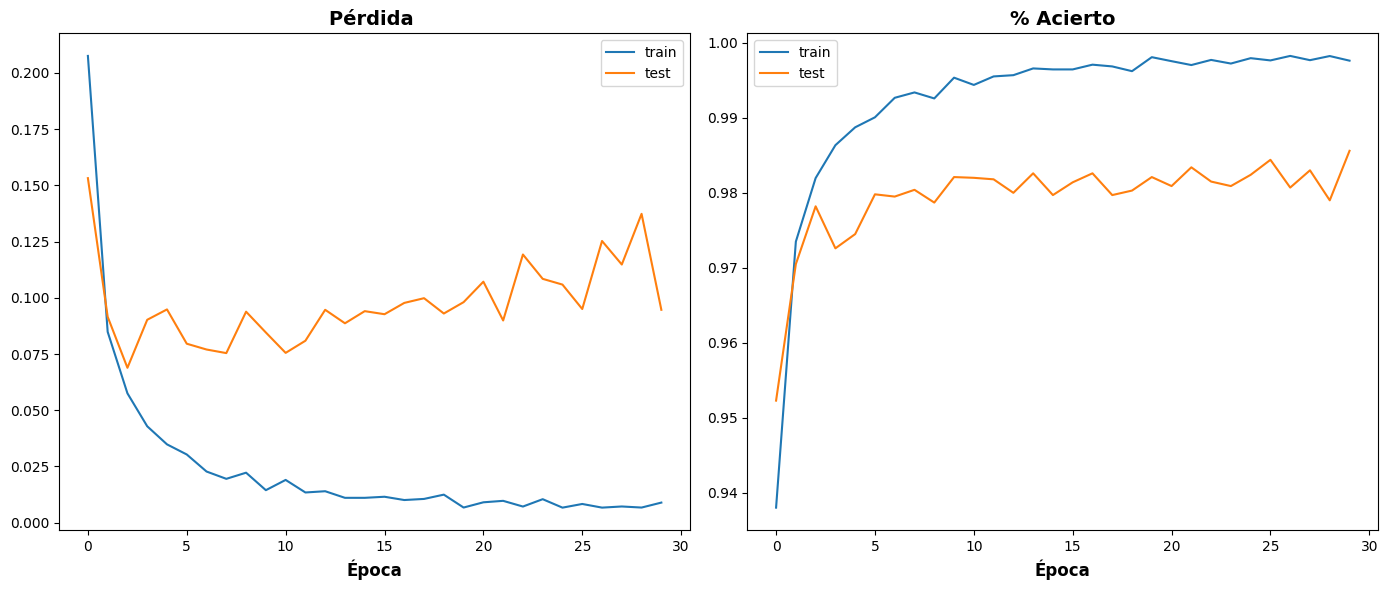

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_epoca.history['loss'], label="train")
axs[0].plot(hist_adam_epoca.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_epoca.history['accuracy'], label="train")
axs[1].plot(hist_adam_epoca.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

## Agregación de regulación (drop-out)

In [ ]:
red_adam_dropout= keras.Sequential(name="Mi_Red")
red_adam_dropout.add(keras.layers.Input(shape=(N,), name='entrada'))
#
red_adam_dropout.add(keras.layers.Dense(30, activation='relu'))
red_adam_dropout.add(keras.layers.Dropout(0.3))
red_adam_dropout.add(keras.layers.Dense(20, activation='relu'))
#
red_adam_dropout.add(keras.layers.Dense(h1, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(h2, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(h3, activation='relu'))
red_adam_dropout.add(keras.layers.Dense(C, activation='softmax'))

red_adam_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

hist_adam_dropout = red_adam_dropout.fit(X_train, y_train,
        epochs=30,
        batch_size=128,
        validation_data=(X_test,y_test)
       )

Epoch 1/30
469/469 [==============================] - 5s 9ms/step - loss: 2.1976 - accuracy: 0.2510 - val_loss: 1.8218 - val_accuracy: 0.5131
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 1.3008 - accuracy: 0.5692 - val_loss: 0.7278 - val_accuracy: 0.7847
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 0.8190 - accuracy: 0.7292 - val_loss: 0.5171 - val_accuracy: 0.8521
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 0.6688 - accuracy: 0.7879 - val_loss: 0.4222 - val_accuracy: 0.8808
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 0.5871 - accuracy: 0.8173 - val_loss: 0.3778 - val_accuracy: 0.8913
Epoch 6/30
469/469 [==============================] - 4s 9ms/step - loss: 0.5294 - accuracy: 0.8370 - val_loss: 0.3365 - val_accuracy: 0.9023
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.4876 - accuracy: 0.8501 - val_loss: 0.3223 - val_accuracy: 0.9049
Epoch 

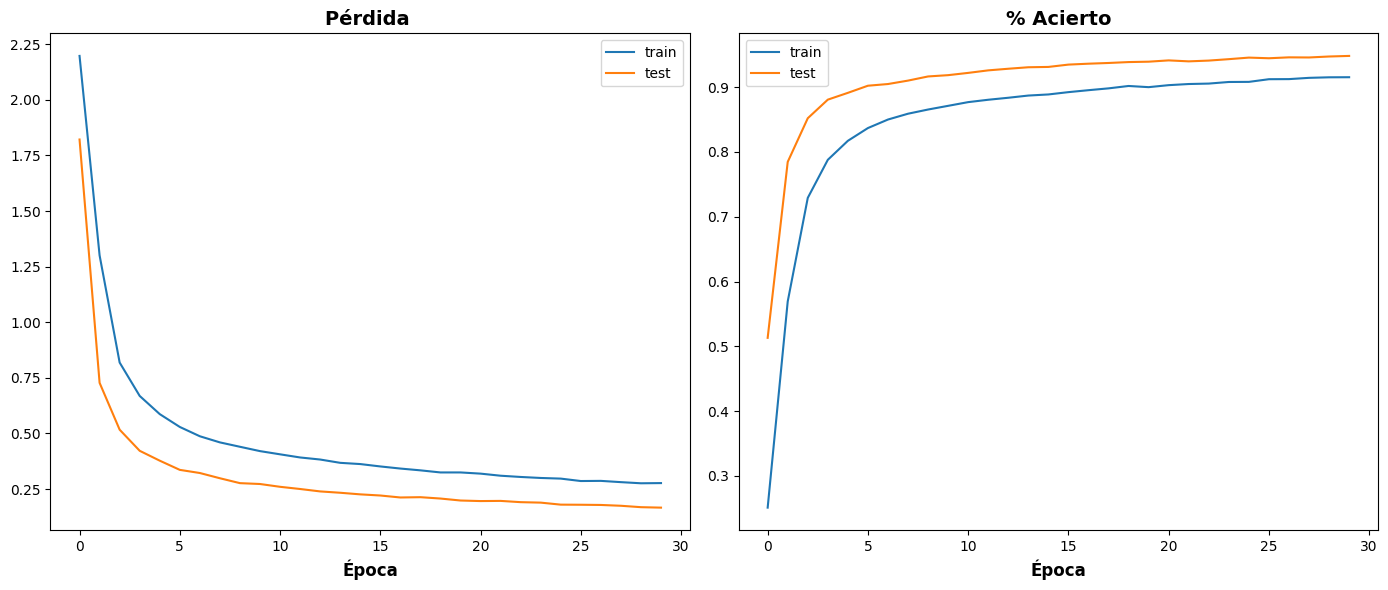

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(hist_adam_dropout.history['loss'], label="train")
axs[0].plot(hist_adam_dropout.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(hist_adam_dropout.history['accuracy'], label="train")
axs[1].plot(hist_adam_dropout.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()